# Exercício 5

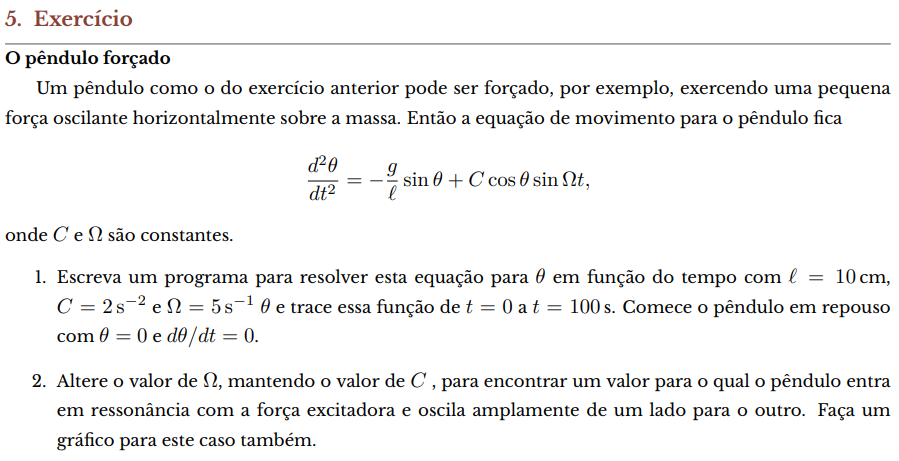

In [67]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Alínea 1

In [68]:
def verlet(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray), v0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `d^2x/dt^2 = func(x, t)` usando o método de Verlet começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0` e `v(start) = v0`.
        
        Esta método consiste em escrever cada EDO de segunda ordem como um par de EDOs de primeira ordem dx/dt = v e dv/dt = f(x, t).

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. Os argumentos `x0` e `v0` devem também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`
        vv: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]
    vv = [v0]

    # Valor de v(t + h/2)
    vleap = v0 + h * func(x0, start) / 2

    th = start  # Valor de t
    xh = x0     # Valor de x(t)
    vh = v0     # Valor de v(t)
    for _ in range(N):
        # Valor de x(t + h)
        xh = xh + h * vleap
        th = th + h

        # Valor de v(t + h) e v(t + 3/2 * h)
        k = h * func(xh, th)
        vh = vleap + k/2
        vleap = vleap + k
        
        tt += [th]
        xx += [xh]
        vv += [vh]
    
    return np.array(tt), np.array(xx), np.array(vv)

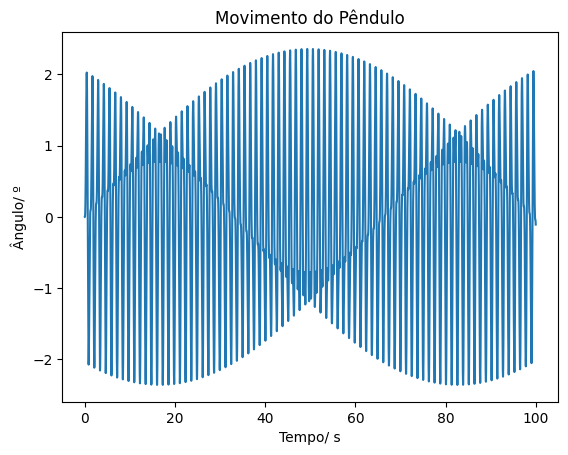

In [69]:
# Constantes
g = 9.81
l = 0.1
C = 2

# Lado direito da EDO
def rhs(theta: (float | np.ndarray), t: (float | np.ndarray), OMEGA: float) -> (float | np.ndarray):
    global g, l, C
    return -(g/l) * np.sin(theta) + C * np.cos(theta) * np.sin(OMEGA * t)


# Resolver a EDO
tt, aa, oo = verlet(0, 100, lambda x, t: rhs(x, t, 5), 40000, 0, 0)

# Fazer o gráfico
plt.title("Movimento do Pêndulo")
plt.plot(tt, aa * (180 / np.pi))
plt.xlabel("Tempo/ s")
plt.ylabel("Ângulo/ º")
plt.show()

## Alínea 2

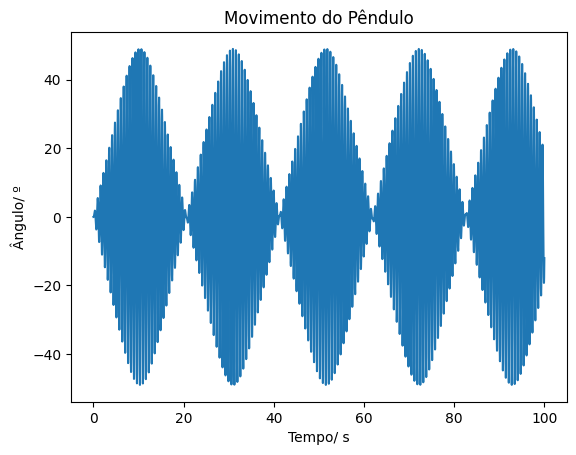

In [70]:
# Frequência natural do pêndulo
omega0 = np.sqrt(g/l)

# Resolver a EDO
tt, aa, oo = verlet(0, 100, lambda x, t: rhs(x, t, omega0), 40000, 0, 0)

# Fazer o gráfico
plt.title("Movimento do Pêndulo")
plt.plot(tt, aa * (180 / np.pi))
plt.xlabel("Tempo/ s")
plt.ylabel("Ângulo/ º")
plt.show()

# Refazer com o método Leapfrog

Começamos por escrever a equação do seguinte modo:

$$
\begin{align*}

\frac{d\theta}{dt} &= \omega
\\\\

\frac{d\omega}{dt} &= -\frac g\ell \sin\theta + C\cos\theta\ \sin\Omega t

\end{align*}
$$

In [71]:
def leapfrog(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método Leapfrog começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    # Valor de x(t + h/2)
    xleap = x0 + h * func(x0, start) / 2

    xh = x0
    th = start
    for _ in range(N):
        # Valor de x(t + h)
        xh = xh + h * func(xleap, th + h/2)
        th = th + h

        # Valor de x(t + h * 3/2)
        xleap = xleap + h * func(xh, th)
        
        xx += [xh]
        tt += [th]
    
    return np.array(tt), np.array(xx)

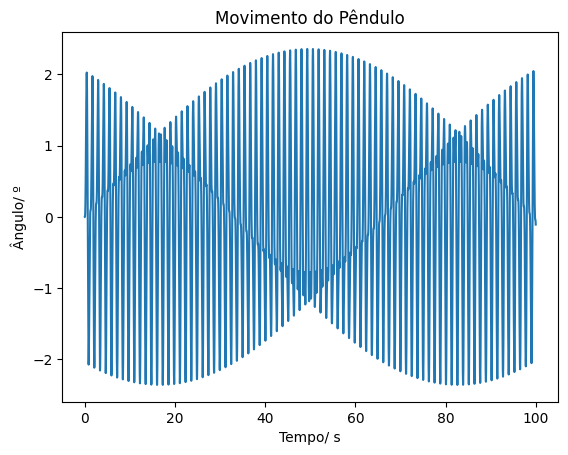

In [72]:
# Constantes
g = 9.81
l = 0.1
C = 2


# Lado direito da EDO
def rhs(rr: (list | np.ndarray), t: (float | np.ndarray), OMEGA: float) -> (float | np.ndarray):
    global g, l, C

    theta, omega = rr[0], rr[1]
    return np.array([omega, -(g/l) * np.sin(theta) + C * np.cos(theta) * np.sin(OMEGA * t)])


# Resolver a EDO
tt, sol = leapfrog(0, 100, lambda x, t: rhs(x, t, 5), 40000, np.array([0, 0]))
aa = np.array([item[0] for item in sol])
oo = np.array([item[1] for item in sol])

# Fazer o gráfico
plt.title("Movimento do Pêndulo")
plt.plot(tt, aa * (180 / np.pi))
plt.xlabel("Tempo/ s")
plt.ylabel("Ângulo/ º")
plt.show()